In [85]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 9999

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [86]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0], 
     [0,1,0,0], 
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [87]:
# TODO 返回矩阵的行数和列数
def shape(M):
    return len(M),len(M[0])

In [88]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [89]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for i in range(len(M)):
        for j in range(len(M[0])):
            M[i][j] = round(M[i][j],decPts)

In [90]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.100s

OK


## 1.4 计算矩阵的转置

In [91]:
# TODO 计算矩阵的转置
def transpose(M):
    #好像强悍的*M写法!!!
    # *M 将矩阵将M分解为元素为M[i]的list，(i in range(0,len(M))),实际上len(*M)等于M的行数
    # zip(*M) 每次从 *M 的所有元素中分别迭代一个元素,形成一个tuple,若*M的元素可迭代多次，则生成多个tuple,
    # 每次迭代出的col明显相当于矩阵的每一列
    # col转化为list,这是因为构造二维list的需要，每个col相当于原矩阵的每一列，故实现矩阵的转置。。。
    #至于算法效率，col的复杂度明显是优于我原先写的col*row的复杂度的。。。
    #感谢老师。。。不知道我对这里理解的对不对。。。
    return [list(col) for col in zip(*M)]

In [92]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


## 1.5 计算矩阵乘法 AB

In [93]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    row_A = len(A)
    column_A = len(A[0])
    row_B = len(B)
    column_B = len(B[0])
    res = []
    if column_A != row_B:
        raise ValueError('The coordinates dimension is not fit')
    for i in range(row_A):
        tmp = []
        for j in range(column_B):
            tmp.append(sum([x*y for x,y in zip(A[i], transpose(B)[j])]))
        res.append(tmp)
    return res

In [94]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.225s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [95]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    #zip函数相当于对可迭代对象A,b进行迭代，每次取到的元素(ra为A的每行A[i], rb为b[i]),通过‘+’运行实现list的拼接。。。
    return [ra + rb for ra,rb in zip(A,b)]

In [96]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [97]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

In [98]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


In [99]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError("scale should not be '0' ")
    if scale ==1:
        return
    else:
        #原切片赋值是受到了Matlab的影响。。。
        M[r] = [x*scale for x in M[r] ]
        

In [100]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [101]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    M[r1][:] = [x+scale*y for x,y in zip(M[r1],M[r2])]

In [102]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

In [103]:
# 不要修改这里！
from helper import *

A = generateMatrix(4,seed,singular=False)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   7,   5,   3,  -5 ||  1  
  -4,   6,   2,  -2 ||  1  
  -9,   4,  -5,   9 ||  1  
  -9, -10,   5,  -4 ||  1  


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    7 & 5 & 3 & -5 & 1\\
    -4 & 6 & 2 & -2 & 1\\
    -9 & 4 & -5 & 9 & 1\\
    -9 & -10 & 5 & -4 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & -\frac{4}{9} & \frac{5}{9} & -1 & -\frac{1}{9}\\
    0 & \frac{38}{9} & \frac{38}{9} & -6 & \frac{5}{9}\\
    0 & \frac{73}{9} & -\frac{8}{9} & 2 & \frac{16}{9}\\
    0 & -14 & 10 & -13 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & -\frac{4}{9} & \frac{5}{9} & -1 & -\frac{1}{9}\\
    0 & 1 & -\frac{5}{7} & \frac{13}{14} & 0\\
    0 & \frac{73}{9} & -\frac{8}{9} & 2 & \frac{2}{9}\\
    0 & \frac{38}{9} & \frac{38}{9} & -6 & \frac{5}{9}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{5}{21} & -\frac{37}{63} & -\frac{1}{9}\\
    0 & 1 & -\frac{5}{7} & \frac{13}{14} & 0\\
    0 & 0 & \frac{103}{21} & -\frac{697}{126} & \frac{16}{9}\\
    0 & 0 & \frac{152}{21} & -\frac{625}{63} & \frac{5}{9}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & -\frac{833}{3192} & -\frac{-59}{456}\\
    0 & 1 & 0 & -\frac{161}{3192} & \frac{25}{456}\\
    0 & 0 & 1 & -\frac{625}{456} & \frac{35}{456}\\
    0 & 0 & 0 & \frac{181}{152} & \frac{639}{456}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & -\frac{833}{3192} & -\frac{-59}{456}\\
    0 & 1 & 0 & -\frac{161}{3192} & \frac{25}{456}\\
    0 & 0 & 1 & -\frac{625}{456} & \frac{35}{456}\\
    0 & 0 & 0 & 1 & \frac{213}{181}\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & 0 & 0 & \frac{193}{1086}\\
    0 & 1 & 0 & 0 & \frac{62}{543}\\
    0 & 0 & 1 & 0 & \frac{1835}{1086}\\
    0 & 0 & 0 & 1 & \frac{213}{181}\end{bmatrix}$


In [104]:
# 不要修改这里！
A = generateMatrix(4,seed,singular=True)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

  -7,  -3,   1,  -9 ||  1  
   0,   0,   0,   0 ||  1  
  -2,   7,   7,  -3 ||  1  
   8,  -5,  -6,   3 ||  1  


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    -7 & -3 & 1 & -9 & 1\\
    0 & 0 & 0 & 0 & 1\\
    -2 & 7 & 7 & -3 & 1\\
    8 & -5 & -6 & 3 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & -\frac{5}{8} & -\frac{3}{4} & \frac{3}{8} & \frac{1}{8}\\
    0 & 0 & 0 & 0 & 1\\
    0 & \frac{23}{4} & \frac{11}{2} & -\frac{9}{4} & \frac{5}{4}\\
    0 & -\frac{59}{8} & -\frac{17}{4} & -\frac{51}{8} & \frac{15}{8} \end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & -\frac{5}{8} & -\frac{3}{4} & \frac{3}{8} & \frac{1}{8}\\
    0 & -\frac{59}{8} & -\frac{17}{4} & -\frac{51}{8} & \frac{15}{8}\\   
    0 & \frac{23}{4} & \frac{11}{2} & -\frac{9}{4} & \frac{5}{4}\\
    0 & 0 & 0 & 0 & 1 \end{bmatrix}$  
    
$ --> \begin{bmatrix}
    1 & 0 & -\frac{23}{59} & \frac{54}{59} & -\frac{2}{59}\\
    0 & 1 & \frac{68}{118} & -\frac{51}{59} & -\frac{15}{59}\\   
    0 & 0 & \frac{129}{59} & -\frac{426}{59} & \frac{160}{59}\\
    0 & 0 & 0 & 0 & 1 \end{bmatrix}$ 
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & -\frac{16}{43} & \frac{58}{129}\\
    0 & 1 & 0 & \frac{119}{43} & -\frac{125}{129}\\   
    0 & 0 & 1 & -\frac{142}{43} & \frac{160}{129}\\
    0 & 0 & 0 & 0 & 1 \end{bmatrix}$  

### 2.3.3 实现 Gaussian Jordan 消元法

In [105]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts = 4, epsilon = 1.0e-16):
     M = augmentMatrix(A, b)
     matxRound(M, decPts)
     for i in range(len(M)):
         max_row = i
         max_value = (M[i][i])
         for j in range(len(M)):
             if j > i and abs(M[j][i]) > abs(max_value):
                 max_row = j
                 max_value = M[j][i]
         if abs(max_value) < epsilon:
             return None
         scaleRow(M, max_row, 1.0/max_value)
         swapRows(M, i, max_row)
         for k in range(len(M)):
             if k != i:
                 addScaledRow(M, k, i, (M[k][i]*-1.0)/(M[i][i]))
         #matxRound(M,decPts)
         a = [[x] for x in transpose(M)[-1]]
     return a

In [106]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.590s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：
因为A已经被写成了分块矩阵的形式，又因为几个分块的特殊性，计算分块矩阵的行列式较为容易，因此尝试从矩阵A的行列式计算进行其一矩阵的证明。

已知$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix}$,根据分块矩阵的行列式计算，$|A| = |I||Y-ZI^{-1}X|$,因为$I$为单位矩阵，所以$|I| = 1$,又Z为全0矩阵，所以$ZI^-1X$为全0矩阵，其大小与Y相同。

即最终A的行列式的值为Y的行列式的值，又因为Y的第一列全为零，根据行列式的计算法则，行列式的值可以写成这一列的各元素与该元素对应的代数余子式的乘积和形式，因为第一列均为0，所以各乘积为0，和亦为0，所以|A| = |Y| = 0.

因为|A|的行列式为0，所以A为奇异矩阵.

# 3  线性回归

## 3.1 随机生成样本点

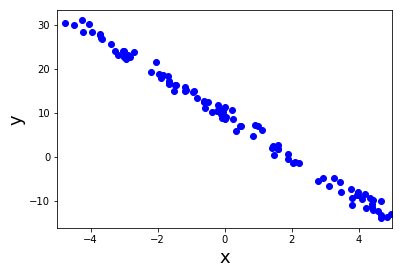

In [107]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

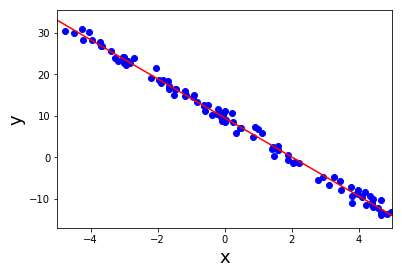

In [113]:
#TODO 请选择最适合的直线 y = mx + b
m = -4.7
b = 9.5

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [114]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    #原先使用x_values, y_values是出现的失误。。。我说怎么出来的误差都是0.0......
    res = [(y-m*x-b)**2 for x,y in zip(X, Y)]
    res = sum(res)*1/len(Y)
    return res

print(calculateMSE(X,Y,m,b))

1.13739931518


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:
$$
\frac{\partial E}{\partial m} = \frac{1}{2}\sum_{i=1}^{n}{\frac{\partial (y_i - mx_i - b)^2}{\partial m}} 
= \frac{1}{2}*2\sum_{i=1}^{n}{(y_i - mx_i - b)(-x_i)} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \frac{1}{2}\sum_{i=1}^{n}{\frac{\partial (y_i - mx_i - b)^2}{\partial m}} 
= \frac{1}{2}*2\sum_{i=1}^{n}{(y_i - mx_i - b)(-1)} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数
目标函数：
因有三个点，所以 n 为 3 
$$
E = \frac{1}{2}\sum_{i=1}^{3}{(y_i - mx_i - b)^2} 
$$
将上述三个点$$(x_i,y_i) i = 1,2,3$$带入，得
$$
E= \frac{1}{2}{(14m^2+3b^2+12mb-22m-10b+9)}
$$
二元二次方程组：
上述方程对m,b分别求偏导数，得到以下方程组：

$$
\begin{cases}
\displaystyle
14m + 6b - 11 = 0 \\
\\
\displaystyle
6m + 3b - 5 = 0 \\
\end{cases}
$$

最优参数：
求解以上方程组，得到 $$ m = \frac{1}{2}, b = \frac{2}{3}$$

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:
$$
right = X^TXh - X^TY  = \begin{bmatrix}
x_1 & x_2 & ... & x_n\\
 1  &  1  & ... &  1  \\
 \end{bmatrix}
 \begin{bmatrix}
 x_1 & 1\\
 x_2 & 1\\
 ... & ... \\
 x_n & 1 \\
 \end{bmatrix}
 \begin{bmatrix}
 m \\
 b \\
 \end{bmatrix}-
\begin{bmatrix}
x_1 & x_2 & ... & x_n\\
 1  &  1  & ... &  1  \\
 \end{bmatrix}
 \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n \\
\end{bmatrix}
$$


$$
= \begin{bmatrix}
m\sum_{i=1}^{n}{x_i^2} + b\sum_{i=1}^{n}{x_i}\\
m\sum_{i=1}^{n}{x_i}   + nb\\
\end{bmatrix}
-\begin{bmatrix}
\sum_{i=1}^{n}{x_iy_i}\\
\sum_{i=1}^{n}{y_i}\\
\end{bmatrix}
=\begin{bmatrix}
\sum_{i=1}^{n}{mx_i^2+bx_i-x_iy_i}\\
\sum_{i=1}^{n}{mx_i+b-y_i}\\
\end{bmatrix}
= \begin{bmatrix}
\sum_{i = 1}^{n}{(-x_i)(y_i - mx_i - b)}\\
\sum_{i = 1}^{n}{(-1)(y_i - mx_i - b)}\\
\end{bmatrix}
=left
$$

故 原式得证.

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [110]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
def linearRegression(X,Y):
    Xmat = [ [x, 1] for x in X]
    Y  = [[y] for y in Y]
    X_t = transpose(Xmat)
    A = matxMultiply(X_t, Xmat)
    b = matxMultiply(X_t, Y)
    res = gj_Solve(A,b)
    return res[0][0], res[1][0]

m,b = linearRegression(X,Y)
print(m,b)

(-4.699213220279385, 9.522206737098191)


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

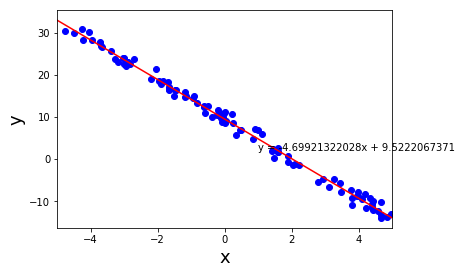

In [111]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [112]:
print(calculateMSE(X,Y,m,b))

1.13689136713
